In [1]:
#20BHI10028 - TUSHAR MISRA
import pandas as pd
import numpy as np

In [2]:
# Importing data.csv
housing = pd.read_csv('data5.csv')

In [3]:
# Looking at the first five rows
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,5250000,5500,3,2,1,1,0,1,0,0,0,0,1,0,1833.333333,0.666667
1,4480000,4040,3,1,2,1,0,0,0,0,1,0,1,0,1346.666667,0.333333
2,3570000,3640,2,1,1,1,0,0,0,0,0,0,0,1,1820.000000,0.500000
3,2870000,3040,2,1,1,0,0,0,0,0,0,0,0,1,1520.000000,0.500000
4,3570000,4500,2,1,1,0,0,0,0,0,0,0,0,0,2250.000000,0.500000


In [4]:
housing.shape

(545, 16)

In [5]:
# What type of values are stored in the columns?
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            545 non-null    int64  
 1   area             545 non-null    int64  
 2   bedrooms         545 non-null    int64  
 3   bathrooms        545 non-null    int64  
 4   stories          545 non-null    int64  
 5   mainroad         545 non-null    int64  
 6   guestroom        545 non-null    int64  
 7   basement         545 non-null    int64  
 8   hotwaterheating  545 non-null    int64  
 9   airconditioning  545 non-null    int64  
 10  parking          545 non-null    int64  
 11  prefarea         545 non-null    int64  
 12  semi-furnished   545 non-null    int64  
 13  unfurnished      545 non-null    int64  
 14  areaperbedroom   545 non-null    float64
 15  bbratio          545 non-null    float64
dtypes: float64(2), int64(14)
memory usage: 68.2 KB


In [6]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio'],
      dtype='object')

In [7]:
# Putting feature variable to X
X = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio']]

# Putting response variable to y
y = housing['price']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


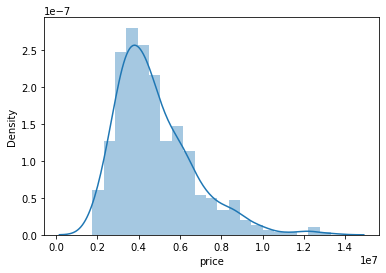

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(y)
plt.show()

In [9]:
y.skew()

1.2122388370279804

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


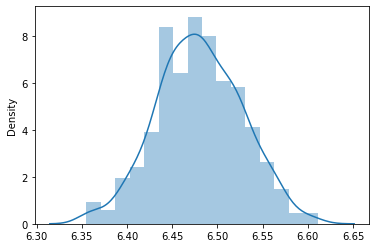

In [10]:
from scipy import stats
y=stats.boxcox(y)[0]
sns.distplot(y)
plt.show()

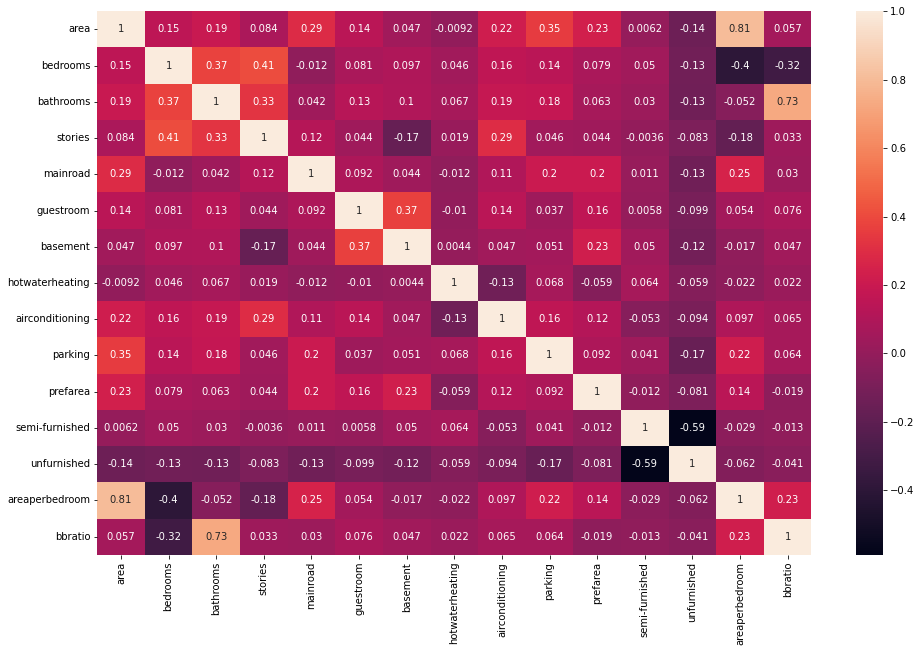

In [11]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Let's see the correlation matrix 
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(X.corr(),annot = True)
plt.show()

In [12]:
#creating correlation matrix for the given data
corrmat = np.corrcoef(X.transpose())

#Make a diagonal matrix with diagonal entry of Matrix corrmat
p=np.diagflat(corrmat.diagonal())

# subtract diagonal entries making all diagonals 0
corrmat_diag_zero = corrmat - p
print("max corr:",corrmat_diag_zero.max(), ", min corr: ", corrmat_diag_zero.min(),)

max corr: 0.8056104195904634 , min corr:  -0.5884049771343842


In [13]:
# Retrieve the (i,j) index for which matrix has maximum value
ij_max = np.unravel_index(corrmat_diag_zero.argmax(), corrmat_diag_zero.shape)
print("ij_max",ij_max)
print("Maximum correlation :",corrmat_diag_zero[ij_max])

ij_max (0, 13)
Maximum correlation : 0.8056104195904634


In [14]:
# Retrieve the (i,j) index for which matrix has absolute minimum value
ij_min = np.unravel_index(np.absolute(corrmat).argmin(), corrmat.shape)
print("ij_min",ij_min)
print("Minimum correlation :",corrmat_diag_zero[ij_min])

ij_min (3, 11)
Minimum correlation : -0.0036483046040634956


In [15]:
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

from sklearn.preprocessing import PowerTransformer

X_train.shape

scaler = PowerTransformer()
Xtrain=scaler.fit_transform(X_train) 
Xtest=scaler.transform(X_test) 

Xtrain.shape

(381, 15)

In [16]:
xtrain_df = pd.DataFrame(Xtrain,columns=X_train.columns)
Xtrain[:,0].max()
xtrain_df['area'].max()

2.873470816532277

In [17]:
y_train.shape

(381,)

In [18]:
xtest_df = pd.DataFrame(Xtest,columns=X_train.columns)
xtest_df['bedrooms'].min()

-1.3669781681719824

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import  linear_model
from sklearn.metrics import mean_squared_error, r2_score
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(Xtrain, y_train)
# Make predictions using the testing set
y_pred = regr.predict(Xtest)

In [20]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 0.00


In [21]:
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y_test, y_pred))

R2 score: 0.72


In [22]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred) 

0.72076251168251

In [23]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA( random_state=42)

In [24]:
#Doing the PCA on the train data
pca.fit(Xtrain)

PCA(random_state=42)

In [25]:
components = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'Feature':X.columns })
components

,PC1,PC2,Feature
0,-0.476385,0.168827,area
1,-0.113266,-0.564131,bedrooms
2,-0.345603,-0.233689,bathrooms
3,-0.137810,-0.457178,stories
4,-0.296363,0.056469,mainroad
5,-0.196351,-0.086351,guestroom
6,-0.096615,-0.120499,basement
7,-0.060173,-0.013837,hotwaterheating
8,-0.254030,-0.128815,airconditioning
9,-0.304426,0.041006,parking


In [26]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                       'PC4':pca.components_[3],'Feature':colnames})

In [27]:
pcs_df

,PC1,PC2,PC3,PC4,Feature
0,-0.476385,0.168827,0.211973,0.059889,area
1,-0.113266,-0.564131,0.121572,0.091297,bedrooms
2,-0.345603,-0.233689,-0.486288,0.202424,bathrooms
3,-0.137810,-0.457178,-0.101445,0.191893,stories
4,-0.296363,0.056469,0.181658,-0.008337,mainroad
5,-0.196351,-0.086351,0.214765,0.069800,guestroom
6,-0.096615,-0.120499,0.270151,-0.094557,basement
7,-0.060173,-0.013837,-0.233303,-0.268260,hotwaterheating
8,-0.254030,-0.128815,0.068828,0.287863,airconditioning
9,-0.304426,0.041006,-0.060089,-0.058928,parking


In [28]:
pca.explained_variance_

array([2.65769941, 2.18678082, 1.57976787, 1.53994779, 1.43405237,
       1.11839734, 0.88874385, 0.83121757, 0.69280095, 0.67809924,
       0.61822323, 0.42835294, 0.37164429, 0.01105935, 0.00268666])

In [29]:
pca.explained_variance_ratio_

array([0.17671492, 0.14540275, 0.10504143, 0.10239373, 0.09535256,
       0.07436413, 0.05909408, 0.05526906, 0.04606551, 0.04508796,
       0.04110671, 0.02848191, 0.02471126, 0.00073536, 0.00017864])

In [30]:
#We can see that all combined retain 0.85963266 or 85.96% of important features

#0.17671492+ 0.14540275+ 0.10504143+ 0.10239373+ 0.09535256+0.07436413+ 0.05909408+ 0.05526906+ 0.04606551+ 
#0.04508796+ 0.04110671+ 0.02848191+ 0.02471126+ 0.00073536+ 0.00017864 = 0.85963266

In [31]:
print("pca.explained_variance_ratio_: ",pca.explained_variance_ratio_.round(3)*100)

pca.explained_variance_ratio_:  [17.7 14.5 10.5 10.2  9.5  7.4  5.9  5.5  4.6  4.5  4.1  2.8  2.5  0.1
  0. ]


In [32]:
print (pca.explained_variance_ratio_.cumsum())

[0.17671492 0.32211767 0.4271591  0.52955283 0.6249054  0.69926952
 0.7583636  0.81363266 0.85969817 0.90478613 0.94589284 0.97437475
 0.999086   0.99982136 1.        ]


In [33]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 17.67,  32.21,  42.71,  52.95,  62.49,  69.93,  75.84,  81.37,
        85.98,  90.49,  94.6 ,  97.45,  99.92,  99.99, 100.01])

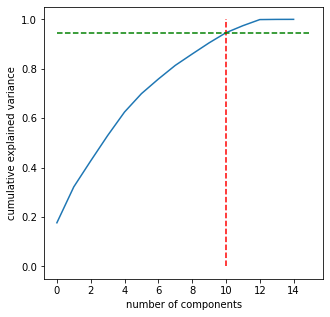

In [34]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (5,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.vlines(x=10, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=.946, xmax=15, xmin=0, colors="g", linestyles="--")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [35]:
product = np.dot(pca.components_[0],pca.components_[1])
product.round(5)

-0.0

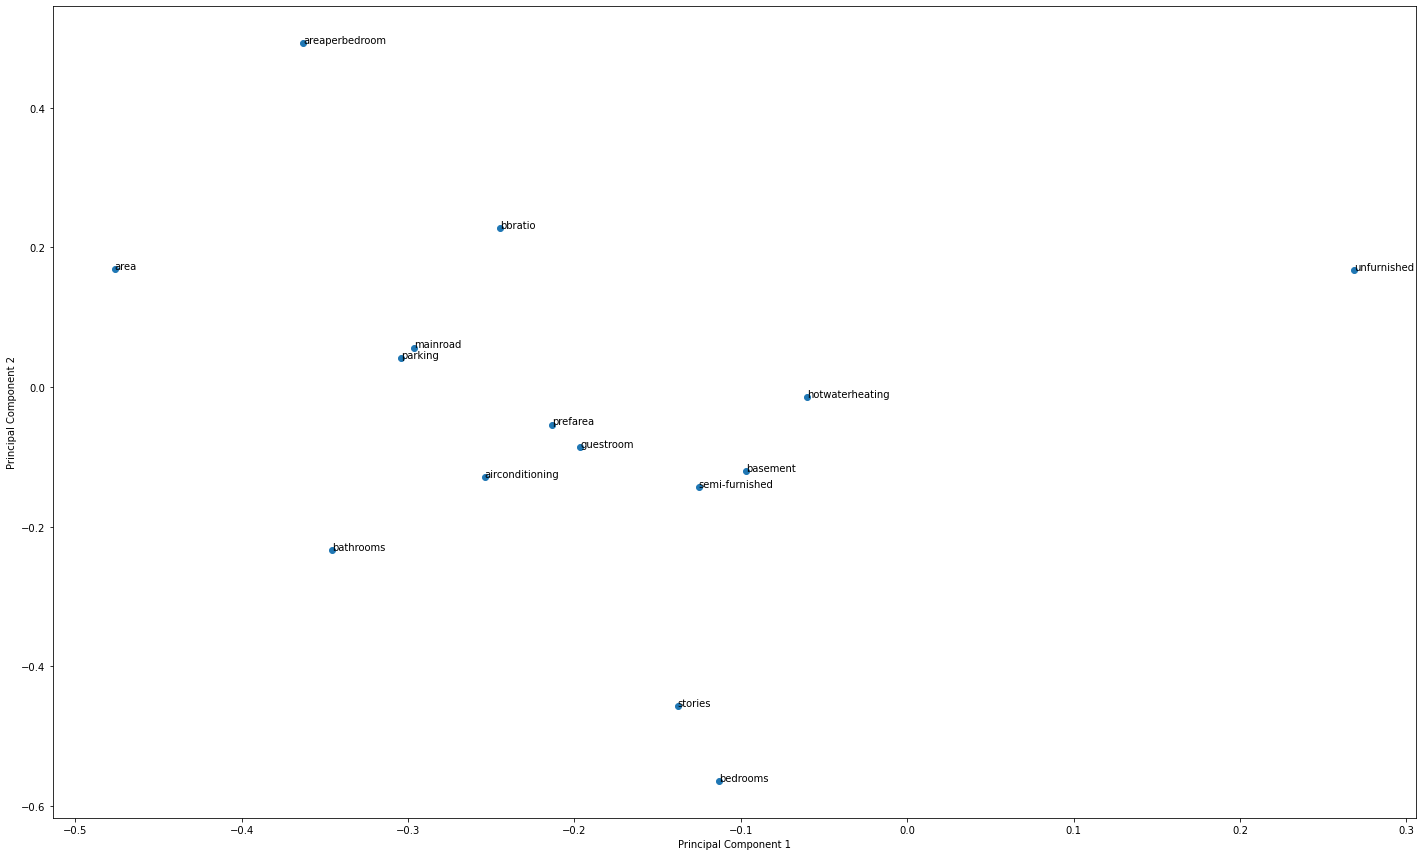

In [36]:
%matplotlib inline
fig = plt.figure(figsize = (20,12))
plt.scatter(components.PC1, components.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(components.Feature):
    plt.annotate(txt, (components.PC1[i],components.PC2[i]))
plt.tight_layout()
plt.show()

In [37]:
pca_train = pca.transform(Xtrain)
pca_train.shape

(381, 15)

In [38]:
pca_train

array([[-4.07650139e-01, -3.76445013e-01,  5.41544721e-01, ...,
        -2.45191095e-01,  1.27978921e-04, -1.99123304e-02],
       [-1.50209846e+00,  1.84984060e+00,  7.25537242e-01, ...,
        -3.23926092e-01,  3.61137518e-02,  3.18050728e-02],
       [ 1.04677653e+00, -1.19897801e+00,  5.18332847e-01, ...,
         2.23579918e-01, -1.44309953e-02, -2.05791463e-02],
       ...,
       [ 5.84847773e-01, -2.82326922e-01,  1.26929366e-01, ...,
         1.05919811e+00, -2.17533465e-02, -5.56099421e-02],
       [ 1.44969308e+00, -1.53949149e+00, -2.51816563e-01, ...,
         1.41054093e-01, -9.43696529e-03,  1.18186615e-02],
       [ 2.05841036e+00, -1.48483174e+00, -6.57680448e-02, ...,
         6.41852020e-01,  1.86463772e-03, -3.59698147e-02]])

In [39]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(pca_train.transpose())
corrmat

array([[ 1.00000000e+00,  1.07617783e-16, -2.73765233e-17,
         1.66369298e-16,  7.18343944e-17,  5.42282536e-17,
        -8.51654436e-17,  1.94997040e-16, -7.57900386e-17,
        -1.43638549e-17, -2.28841484e-16,  5.25743673e-17,
        -4.70359539e-18,  9.27059808e-16, -1.93691329e-14],
       [ 1.07617783e-16,  1.00000000e+00,  3.77258131e-16,
         1.12084011e-16, -2.24378070e-16,  5.23099101e-17,
         1.25743907e-16, -1.10952377e-16,  2.44012953e-16,
         1.71547115e-16,  5.62858673e-17, -2.26404154e-17,
         1.30120530e-16,  9.01779571e-17, -3.50294152e-15],
       [-2.73765233e-17,  3.77258131e-16,  1.00000000e+00,
         1.85818380e-16, -4.25488709e-16, -3.16515093e-17,
         1.72599579e-16, -9.58650898e-17, -2.41290098e-16,
        -4.11002764e-16, -3.78414095e-17, -3.69370713e-16,
         1.89505864e-16, -2.74085986e-15, -7.38613031e-15],
       [ 1.66369298e-16,  1.12084011e-16,  1.85818380e-16,
         1.00000000e+00,  4.41335419e-15,  2.35092887

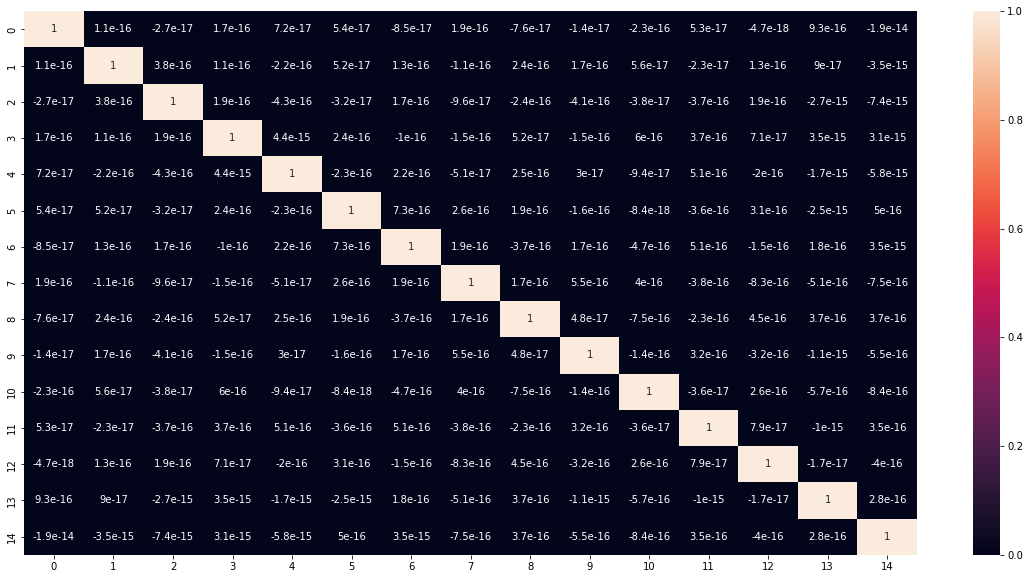

In [40]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)
plt.show()

In [41]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 4.413354191525288e-15 , min corr:  -1.9369132874835333e-14


In [42]:
#Applying selected components to the test data - 13 components
pca_test = pca.transform(Xtest)
pca_test.shape

(164, 15)

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import  linear_model
from sklearn.metrics import mean_squared_error, r2_score
# Create linear regression object
regrpca = linear_model.LinearRegression()
# Train the model using the principal components of the transformed training sets
regrpca.fit(pca_train, y_train)
# Make predictions using the principal components of the transformed testing set
y_pca_pred = regrpca.predict(pca_test)

In [44]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pca_pred))

Mean squared error: 0.00


In [45]:
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y_test, y_pca_pred))

R2 score: 0.72


In [46]:
pca = PCA(n_components=10,random_state=42)
#Scale and transform data to get Principal Components

Xtrain_reduced = pca.fit_transform(Xtrain)
Xtest_reduced = pca.transform(Xtest)
regrpca6 = linear_model.LinearRegression()
# Train the model using the principal components of the transformed training sets
regrpca6.fit(Xtrain_reduced, y_train)
# Make predictions using the principal components of the transformed testing set
y_pred = regrpca6.predict(Xtest_reduced)

In [47]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 0.00


In [48]:
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y_test, y_pred))

R2 score: 0.72


In [49]:
#We get less accuancy (~60%) as using only 2 components did not retain much of the feature information. 
#However in real life you will find many cases where using 2 or few PCA components can still give you a pretty good accuracy